# Multi feature, but simple model
This model uses multiple features as inputs. 

Main takeaways:
 - having multiple inputs in a keras Dense layer doesn't actually help the model
 - the median_income feature is the most important feature, and even the multi feature model relies on that mostly
 - the difference between th
 
Known limitations of this notebook:
 - no test/validation split of the dataset
 - no data preprocessing
 - no data normalization

In [1]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from helper import charts

In [2]:
# Import the dataset.
training_df = pd.read_csv(filepath_or_buffer="https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")

# Scale the label.
training_df["median_house_value"] /= 1000.0

In [3]:
def build_model(my_learning_rate, n):
  """Create and compile a simple linear regression model. n is the number of features as inputs"""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer.
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(n,)))

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model        


def train_model(model, df, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the model the feature and the label.
  # The model will train for the specified number of epochs. 
  history = model.fit(x=df[feature], y=df[label], batch_size=batch_size, epochs=epochs)

  return history

In [5]:
# The following variables are the hyperparameters.
learning_rate = 0.01
epoch_count = 50
batch_size = 64

# Specify the feature and the label.
my_feature = ["longitude", "latitude", "total_rooms", "total_bedrooms", "population", "households", "median_income"]
my_label="median_house_value" # the median value of a house on a specific city block.
# That is, you're going to create a model that predicts house value based 
# solely on total_rooms.  

# Invoke the functions.
my_model = build_model(learning_rate, n=len(my_feature))
history = train_model(my_model, training_df, my_feature, my_label, epoch_count, batch_size)

Epoch 1/50
 20/266 [=>............................] - ETA: 1s - loss: 1619210.6250 - root_mean_squared_error: 1272.4821

2023-02-18 22:53:17.767370: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


266/266 [==============================] - 2s 6ms/step - loss: 215119.5156 - root_mean_squared_error: 463.8098
Epoch 2/50
266/266 [==============================] - 1s 5ms/step - loss: 38603.5781 - root_mean_squared_error: 196.4780
Epoch 3/50
266/266 [==============================] - 1s 5ms/step - loss: 20860.4062 - root_mean_squared_error: 144.4313
Epoch 4/50
266/266 [==============================] - 1s 5ms/step - loss: 15209.1709 - root_mean_squared_error: 123.3255
Epoch 5/50
266/266 [==============================] - 1s 5ms/step - loss: 13176.6084 - root_mean_squared_error: 114.7894
Epoch 6/50
266/266 [==============================] - 1s 5ms/step - loss: 12392.4385 - root_mean_squared_error: 111.3213
Epoch 7/50
266/266 [==============================] - 1s 5ms/step - loss: 11937.7002 - root_mean_squared_error: 109.2598
Epoch 8/50
266/266 [==============================] - 1s 5ms/step - loss: 11510.9697 - root_mean_squared_error: 107.2892
Epoch 9/50
266/266 [======================

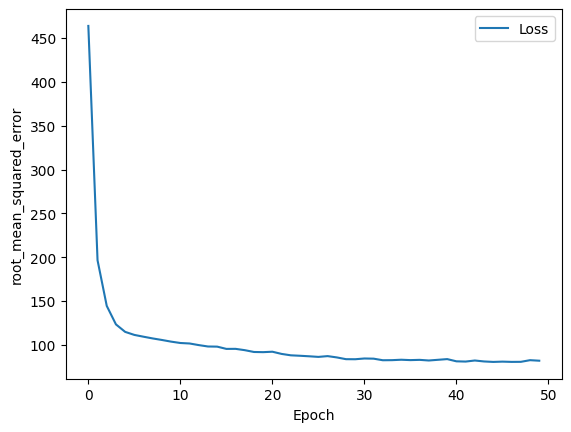

In [6]:
#saving history and epcohs to dataframe
epochs = history.epoch
hist = pd.DataFrame(history.history)
rmse = hist["root_mean_squared_error"]
charts.plot_training_loss(rmse)

In [7]:
#sampling data to test/validate on
sample_df = training_df.sample(n=200, ignore_index=True)
features = sample_df[my_feature]
predictions = my_model.predict(features).ravel()
sample_df["prediction"] = predictions

sample_df.head()

7/7 [==============================] - 0s 3ms/step


2023-02-18 22:55:27.414287: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,prediction
0,-117.89,33.94,20.0,3349.0,685.0,1822.0,675.0,4.7216,227.0,242.552048
1,-122.14,37.69,38.0,1571.0,317.0,874.0,301.0,4.4659,189.1,218.635559
2,-121.30,38.60,32.0,9534.0,1819.0,4951.0,1710.0,3.3926,103.4,148.935181
3,-118.18,34.04,36.0,1807.0,630.0,2118.0,669.0,1.5500,129.0,115.627136
4,-121.63,38.04,25.0,2019.0,411.0,888.0,326.0,3.2619,183.8,163.309433


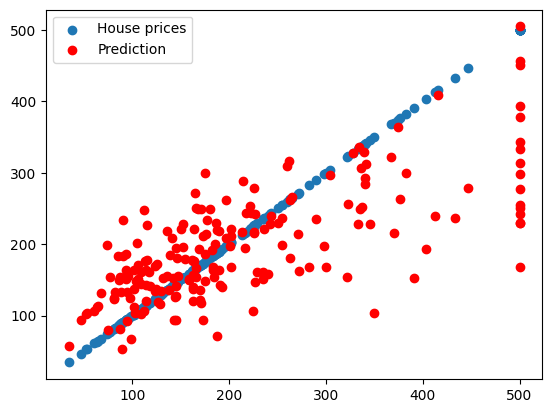

In [8]:
charts.plot_model_accuracy(sample_df, my_label, label="House prices")


In [9]:
#weights per features
weights = pd.DataFrame.from_dict({
    "feature" : my_feature,
    "weight" : my_model.get_weights()[0].ravel(),
    "correlation" : training_df.corr()["median_house_value"].filter(items=my_feature)
})

weights
my_model.get_weights()

[array([[-1.2175361e+00],
        [-3.2833991e+00],
        [-1.7826201e-02],
        [ 3.6702324e-02],
        [-4.2429570e-02],
        [ 1.7111513e-01],
        [ 4.3773865e+01]], dtype=float32),
 array([0.13542433], dtype=float32)]